In [ ]:
from google.colab import drive

drive.mount('/gdrive')
%cd /gdrive/My\ Drive

Mounted at /gdrive
/gdrive/My Drive


>>>>loading data yeet
with
without
>>>>preprocessing the data
>>>>creating the model
>>>>compiling model...
>>>>fitting model...
Epoch 1/20
35/35 [==============================] - 162s 5s/step - loss: 0.6702 - accuracy: 0.5982 - val_loss: 0.5743 - val_accuracy: 0.7536
Epoch 2/20
35/35 [==============================] - 161s 5s/step - loss: 0.4232 - accuracy: 0.8164 - val_loss: 0.3092 - val_accuracy: 0.8406
Epoch 3/20
35/35 [==============================] - 159s 5s/step - loss: 0.2117 - accuracy: 0.9218 - val_loss: 0.1657 - val_accuracy: 0.9312
Epoch 4/20
35/35 [==============================] - 157s 4s/step - loss: 0.1675 - accuracy: 0.9382 - val_loss: 0.1836 - val_accuracy: 0.9312
Epoch 5/20
35/35 [==============================] - 154s 4s/step - loss: 0.1753 - accuracy: 0.9309 - val_loss: 0.1795 - val_accuracy: 0.9275
Epoch 6/20
35/35 [==============================] - 151s 4s/step - loss: 0.1116 - accuracy: 0.9582 - val_loss: 0.1308 - val_accuracy: 0.9457
Epoch 7/20
35/35 [=======

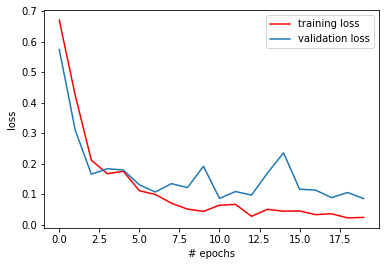

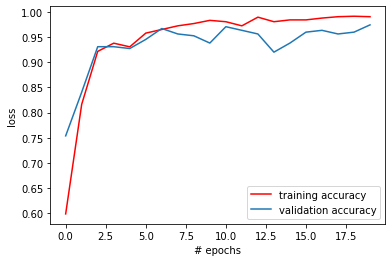

>>>>evaluating the model
Test loss: 0.08577976375818253
Test accuracy: 0.9746376872062683


In [ ]:

import numpy as np
import cv2
import os
from google.colab import drive
from matplotlib import pyplot as plt
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D, Dropout
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint
# important one, used before to_categorical()
from sklearn.preprocessing import LabelBinarizer

file_path = r'/gdrive/My Drive/mask_detection'
categories = os.listdir(file_path)

images = []
labels = []

print(">>>>loading data yeet")
for category in categories:
  print(category)
  # goes into each individual folder.
  folder = os.path.join(file_path, category)
  for image in os.listdir(folder):
    image_url = os.path.join(folder, image)
    if image != '.DS_Store':
      img = cv2.imread(image_url)
      gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
      resize = cv2.resize(gray, (100, 100))
      images.append(resize)
      labels.append(category)
      # if image != '.DS_Store':
      #   img = load_img(image_url, grayscale=True)
      #   images.append(img)
      #   labels.append(category)


#  remove dtype = "float32"
images = np.array(images, dtype="float32")
labels = np.array(labels)

# # have to save these above data 
# np.save('images', images)
# np.save('labels', labels)

#  
img_x = 100
img_y = 100
Epoch = 20
# 

print(">>>>preprocessing the data")
(x_train, x_test, y_train, y_test) = train_test_split(images, labels, test_size=0.20, stratify=labels, random_state=42)
#  1 since grayscale image
x_train = x_train.reshape(x_train.shape[0], img_x, img_y, 1)
x_test = x_test.reshape(x_test.shape[0], img_x, img_y, 1)
shape = (img_x, img_y, 1)

# change dtype
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# y_train : [0. 1.] 
# with num_classes = 2
l = LabelBinarizer()
y_train = l.fit_transform(y_train)
y_test = l.fit_transform(y_test)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

def use_model_one():
  # building the model
  print(">>>>creating the model")
  model = Sequential()
  # first layer
  model.add(Conv2D(200, kernel_size=(3, 3), strides=(1, 1), activation='relu', input_shape=(img_x, img_y, 1)))
  model.add(MaxPooling2D(pool_size=(2, 2)))

  # second layer
  model.add(Conv2D(100, kernel_size=(3, 3), strides=(1, 1), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))

  third layer
  model.add(Conv2D(256, kernel_size=(3, 3), strides=(1, 1), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))

  # flatten out
  model.add(Flatten())
  # dropput to overcome overfitting
  model.add(Dropout(0.5))
  # 64 neurons flatten layers
  model.add(Dense(50, activation='relu'))
  # target layer with 2 outcomes ['with', 'without']
  model.add(Dense(2, activation='softmax'))
  return model


# # compile the model
# print(">>>>compiling model...")
# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

def use_model_two():
  # building the model
  print(">>>>creating the model")
  model = Sequential()

  model.add(Conv2D(60,(5,5),activation='relu',input_shape=(100,100,1)))
  model.add(Conv2D(60,(5,5),activation='relu'))
  model.add(MaxPooling2D(2,2))

  model.add(Conv2D(30,(3,3),activation='relu'))
  model.add(Conv2D(30,(3,3),activation='relu'))
  model.add(MaxPooling2D(2,2))
  model.add(Dropout(0.5))

  model.add(Flatten())
  model.add(Dense(500,activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(2,activation='softmax'))
  return model

# call the model
model = use_model_two()

# compile the model
print(">>>>compiling model...")
history = model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

'''  save_freq='epoch'. '''
''' try the above thing and see if accuracy increases '''
# saving the data at an interval
# checkpoint = ModelCheckpoint('mask_model.model',monitor='val_loss', verbose=0, save_best_only=True, mode='auto')

print(">>>>fitting model...")
history = model.fit(x_train, y_train, batch_size=32, epochs=20, validation_data=(x_test, y_test))

# saving the data for future use
print(">>>>saving the weights")
model.save('mask_model.h5')

print(">>>>drawing the graph")
plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()


print(">>>>evaluating the model")
result = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', result[0])
print('Test accuracy:', result[1])

() with mask


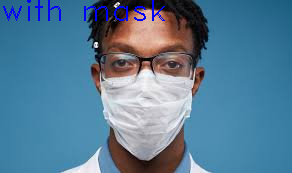

In [ ]:

import numpy as np
import cv2
import os
from google.colab import drive
from matplotlib import pyplot as plt
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D, Dropout
from keras.models import Sequential, load_model
from keras.callbacks import ModelCheckpoint
# important one, used before to_categorical()
from sklearn.preprocessing import LabelBinarizer
from google.colab.patches import cv2_imshow


my_model = load_model('face_mask_classifications.h5')

# video = cv2.VideoCapture('elevator speech.mov')

# without mask
# frame = cv2.imread("IMG-3516.jpg")
frame = cv2.imread("three.jpg")


# with mask
# frame = cv2.imread("mask.jpeg")


faceCascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')


# file_path = r'/gdrive/My Drive/mask_detection'
# categories = os.listdir(file_path)

# x_train = []

# print(">>>>loading data yeet")
# cnt = 0
# flag = 0
# for category in categories:
#   print(category)
#   if category == 'with_mask' and cnt <=20:
#     # goes into each individual folder.
#     folder = os.path.join(file_path, category)
#     for image in os.listdir(folder):
#       print(category, cnt)
#       cnt+=1
#       image_url = os.path.join(folder, image)
#       if cnt >20:
#         flag = 1
#         break
#       elif image != '.DS_Store':
#         img = cv2.imread(image_url)
#         gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#         resize = cv2.resize(gray, (100, 100))
#         x_train.append(resize)
#         # labels.append(category)
#     if flag == 1:
#       break
# # result --> 1 --> without mask
# # result --> 0 --> with mask


# print("data loaded")
# x_train = np.array(x_train, dtype="float32")

# correct=0
# total=0
# for resized in x_train:
#   resized = resized.astype('float32')
#   resized /= 255
#   img = np.reshape(resized, (1, 100, 100, 1))
#   pred = my_model.predict(img) 
#   result = np.argmax(pred, axis=1)[0]  
#   if result == 0:
#     correct+=1
#   total+=1

# acc = correct/total
# print(correct)

# print(video.isOpened())
gray = cv2.cvtColor(frame, cv2.COLOR_BGRA2GRAY)
faces = faceCascade.detectMultiScale(gray, scaleFactor=1.2, minNeighbors=5) 
resized = cv2.resize(gray, (100, 100))
resized = resized.astype('float32')
resized /= 255
img = np.reshape(resized, (1, 100, 100, 1))
pred = my_model.predict(img)
result = np.argmax(pred, axis=1)[0]
string = 'without mask' if result == 1 else 'with mask'
print(faces, string)
# for (x, y, w, h) in faces:
#     cv2.rectangle(frame, (x,y),(x+w,y+h),(255,0,0),7)
cv2.putText(frame, string, (0,20), cv2.FONT_HERSHEY_DUPLEX, 1, (255,0,0),1)

cv2_imshow(frame)
if cv2.waitKey(5) & 0xFF == ord('q'):
  cv2.destroyAllWindows()

# while True:
#     cap, frame = video.read()
#     gray = cv2.cvtColor(frame, cv2.COLOR_BGRA2GRAY)
#     faces = faceCascade.detectMultiScale(gray, scaleFactor=1.2, minNeighbors=5) 
#     resized = cv2.resize(gray, (100, 100))
#     resized = resized.astype('float32')
#     # print(resized)
#     resized /= 255
#     img = np.reshape(resized, (1, 100, 100, 1))
#     pred = my_model.predict(img)
#     result = np.argmax(pred, axis=1)[0]
#     string = 'without mask' if result == 0 else 'with mask'
#     # print(string)
#     for (x, y, w, h) in faces:
#         cv2.rectangle(frame, (x,y),(x+w,y+h),(255,0,0),7)
#         cv2.putText(frame, string, (x,y+h+100), cv2.FONT_HERSHEY_DUPLEX, 2, (255,0,0),4)

#     cv2_imshow(frame)
#     if cv2.waitKey(5) & 0xFF == ord('q'):
#         break


# video.release()
# cv2.destroyAllWindows()

# Show the model architecture
# my_model.summary()
 





In [ ]:
ls